## Introduction



In our last project we used data to estimate systems of food demand
using different datasets.  An output from that project was as set of
`cfe.Result` objects; these bundle together both data and the results
from the demand system estimation, and can be used for prediction as
well.  

Here we&rsquo;ll explore some of the uses of the `cfe.Result` class, using
an instance created using data from the Indian ICRISAT data.

If you don&rsquo;t already have the latest version of the `cfe` package
installed, grab it, along with some dependencies:



In [10]:
!pip install CFEDemands --upgrade --pre
!pip install xarray --upgrade
!pip install h5netcdf

Requirement already up-to-date: CFEDemands in /srv/app/venv/lib/python3.6/site-packages (0.2.7.dev0)
Requirement already up-to-date: xarray in /srv/app/venv/lib/python3.6/site-packages (0.15.1)


In [11]:
import cfe

cfe.Result?

An instance `r` of `cfe.Result` can be made persistent with
`r.to_dataset('my_result.ds')`, which saves the instance &ldquo;on disk&rdquo; in
[NetCDF format](https://en.wikipedia.org/wiki/NetCDF), and can be loaded using `cfe.from_dataset`.  We use
this method below to load data and demand system estimated from the
Ethiopia data:



In [12]:
r = cfe.result.from_dataset('Ethiopia_small.ds')

Our focus earlier was on estimation, but the result `r` already has
encoded in it the results of that estimation.

There are parameters $\alpha$:



In [13]:
r.get_alpha(as_df=True).dropna()

i
Banana           1.580765
Barley           2.345235
Chat / Kat       3.916335
Chick Pea        2.082343
Coffee           2.963819
Eggs             2.259911
Haricot Beans    2.012021
Horsebeans       2.359174
Lentils          2.378202
Maize            2.549806
Milk             2.615847
Onion            2.050422
Potato           1.834936
Salt             0.403211
Sorghum          2.799647
Sugar            2.239737
Teff             3.418198
Wheat            3.021346
Name: alpha, dtype: float64

Elasticity parameters $\beta$:



In [14]:
r.get_beta(as_df=True).dropna()

i
Banana           0.402767
Barley           0.929820
Chat / Kat       0.421841
Chick Pea        0.754155
Coffee           0.341124
Eggs             0.218937
Haricot Beans    0.624633
Horsebeans       0.632542
Lentils          0.412041
Maize            0.730700
Milk             0.347794
Onion            0.326441
Potato           0.274735
Salt             0.250247
Sorghum          0.921510
Sugar            0.461780
Teff             0.453768
Wheat            0.856169
Name: beta, dtype: float64

And parameters related to household characteristics $\delta$:



In [15]:
r.delta.to_dataframe().unstack('k').dropna()

delta                                                    \
k                 F 0-3   F 14-18   F 19-30   F 31-50     F 4-8     F 51+   
i                                                                           
Banana        -0.041680  0.135124  0.119469  0.058901 -0.062178  0.057870   
Barley         0.060847  0.160156  0.181576  0.065316  0.003294  0.066492   
Chat / Kat     0.183911 -0.084609 -0.012299 -0.125368  0.052870  0.051837   
Chick Pea     -0.058922  0.076973  0.103839  0.154312  0.080259  0.109017   
Coffee         0.049136  0.064365  0.132727  0.119389  0.000534  0.011545   
Eggs          -0.051808  0.097252  0.140007  0.087295 -0.026832  0.132824   
Haricot Beans  0.151469  0.093367 -0.022535  0.114972  0.178256  0.319418   
Horsebeans     0.071565  0.102440  0.084509  0.073768  0.035107  0.101438   
Lentils        0.033975  0.076014  0.116623  0.118979  0.031286  0.032777   
Maize          0.168858  0.045025  0.047500  0.103505  0.203130  0.195555   
Milk           0.269819  0.159296  0.077638  0.120299  0.086458  0.104900   
Onion          0.020628  0.083072  0.181644  0.131511  0.015322  0.016468   
Potato         0.075494  0.052202  0.093455  0.022081  0.030358  0.054011   
Salt           0.069499  0.025401  0.089175  0.064990  0.043398 -0.000587   
Sorghum        0.036787  0.016540 -0.024783 -0.033643  0.150645  0.013265   
Sugar          0.154715  0.082592  0.136417  0.109887  0.120432  0.069063   
Teff          -0.020147  0.118776  0.165312  0.213938  0.028188  0.065383   
Wheat          0.156169  0.122708  0.048155  0.076260  0.133891  0.131178   

                                                                           \
k                F 9-13     M 0-3   M 14-18   M 19-30   M 31-50     M 4-8   
i                                                                           
Banana        -0.020986  0.028977  0.019001  0.092642  0.227240 -0.055562   
Barley         0.131837  0.046245  0.138875  0.099159  0.059256  0.011783   
Chat / Kat     0.061692  0.038726  0.014287  0.207572  0.251498  0.116725   
Chick Pea      0.111385  0.014251  0.096653  0.132291  0.201317  0.077510   
Coffee         0.008041 -0.007486 -0.013776  0.122627  0.101183  0.044945   
Eggs          -0.002785  0.057078  0.057878  0.092305  0.179983 -0.064904   
Haricot Beans  0.101808  0.120848  0.153752  0.144374  0.068811  0.139900   
Horsebeans     0.080538  0.036428  0.068877  0.159912  0.099053  0.095341   
Lentils        0.073363 -0.011152  0.056182  0.103025  0.208473  0.061996   
Maize          0.147100  0.149083  0.074493  0.131619  0.157296  0.232135   
Milk           0.011247  0.221282  0.102319 -0.004193  0.148538  0.164217   
Onion          0.036535  0.024368  0.034192  0.100229  0.150291 -0.031828   
Potato         0.085108  0.065097  0.047996  0.093952  0.126494  0.053551   
Salt           0.110582  0.071613  0.045922  0.084043  0.063061  0.093904   
Sorghum        0.187029  0.084002  0.095256  0.069806  0.121875  0.256042   
Sugar          0.086145  0.099682  0.075972  0.113577  0.046506  0.102214   
Teff           0.073752  0.008325  0.119804  0.190597  0.281978  0.065659   
Wheat          0.125466  0.131630  0.203991  0.132343  0.133915  0.170824   

                                   
k                 M 51+    M 9-13  
i                                  
Banana         0.065332 -0.074827  
Barley        -0.016253 -0.028107  
Chat / Kat     0.226806  0.041379  
Chick Pea      0.198193  0.095822  
Coffee         0.103896 -0.063190  
Eggs           0.120536 -0.025731  
Haricot Beans  0.225381  0.123124  
Horsebeans     0.160418  0.103697  
Lentils        0.247723  0.000688  
Maize          0.277906  0.214095  
Milk           0.237364 -0.013747  
Onion          0.107824 -0.043789  
Potato         0.123399  0.074995  
Salt           0.110238  0.080911  
Sorghum        0.242486  0.195108  
Sugar          0.138135  0.051752  
Teff           0.210661  0.056249  
Wheat          0.179635  0.149660

The triple of paramters $(\alpha,\beta,\delta)$ completely describes
the demand system and the corresponding utility function (over the
goods we observe).



## Demands



As mentioned above, we&rsquo;ve estimated the parameters of a Frischian
demand system (demands that depend on prices and the households
marginal utility of expenditures).  But we can *compute* the
corresponding Marshallian (depends on prices and budget) or Hicksian
(depends on prices and the level of utility) demands for this same
population, using the `cfe.Result.demands` method.  

Let&rsquo;s compute Marshallian demands.  Start with a choice of budget $x$
and prices.  We&rsquo;ll use the earliest prices, and focus on
the first market we&rsquo;re interested in.



In [16]:
t = r.firstround  # First round
m = r.coords['m'][0] # First market

x = r.get_predicted_expenditures().sum('i')
medianx = x.where(x>0).sel(t=t,m=m).median('j').values # Budget (median household)

/srv/app/venv/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/srv/app/venv/lib/python3.6/site-packages/xarray/core/nputils.py:215: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Now compute expenditures on different items.  The object `r` already knows what the estimated
parameters are, and uses those automatically:



In [17]:
xbar=r.demands(medianx) # Expenditures given median budget
xbar

i
Banana             4.817525
Barley            76.746701
Chat / Kat        13.900936
Chick Pea         27.721953
Coffee             6.070387
Eggs               2.727390
Haricot Beans     14.995097
Horsebeans        19.328798
Lentils            6.938170
Maize             35.179968
Milk               5.571496
Onion              4.168791
Potato             3.133966
Salt               1.978220
Sorghum          112.220420
Sugar              8.222924
Teff              13.532824
Wheat             97.082992
Name: quantities, dtype: float64

So we can compute expenditures, but these are in units of Rupees.
We can get into physical units (say kilograms) by dividing coconut
expenditures by the price per kg in a given time and place:



In [37]:
USE_GOOD = 'Chick Pea'
    
# Reference prices for kgs at time t in market m
ref_price = r.prices.sel(t=t,m=m,u='Kg')

r.demands(medianx)[USE_GOOD]/ref_price.loc[USE_GOOD].values

1.3895114059452724

Now we can trace out demands for a household with median budget but
varying prices of coconuts (holding other prices fixed):



Text(0, 0.5, 'Price Scale')

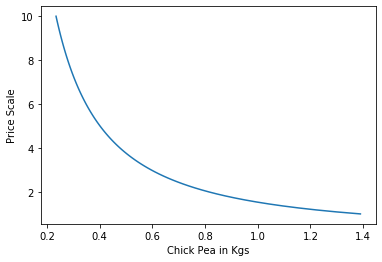

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Scales of prices:
# Scales of prices:
P = np.linspace(1,10,100).tolist()

plt.plot([r.demands(medianx,p={USE_GOOD:scale})[USE_GOOD]/ref_price.loc[USE_GOOD].values for scale in P],P)

plt.xlabel("%s in Kgs" % USE_GOOD)
plt.ylabel('Price Scale')

Let&rsquo;s trace out demands for different budgets:



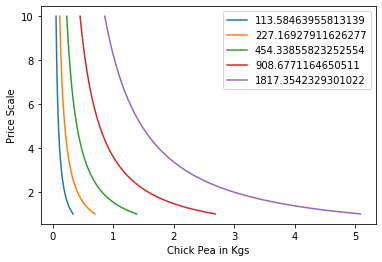

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = [medianx*s for s in [.25,.5,1.,2,4]]
for myx in X:
    plt.plot([r.demands(myx,p={USE_GOOD:scale})[USE_GOOD]/ref_price.loc[USE_GOOD].values for scale in P],P)

plt.xlabel("%s in Kgs" % USE_GOOD)
plt.ylabel('Price Scale')
plt.legend(X)